In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the file

df = pd.read_csv('Desktop\Walmart Dataset.csv')

In [3]:
df.head(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
5  211.380643         8.106  
6  211.215635         8.106  
7  211.018042         8.106  
8  210.820450         7.808  
9  210.622857         7.808

### Performing EDA

In [4]:
df.shape

(6435, 8)

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Converting the date column from object to datetime format

df['Date'] = pd.to_datetime(df['Date'])

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_date

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
df.head(5)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

1.You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

In [10]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

pd.unique(df['Store']) # this represents there are a total of 45 different stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

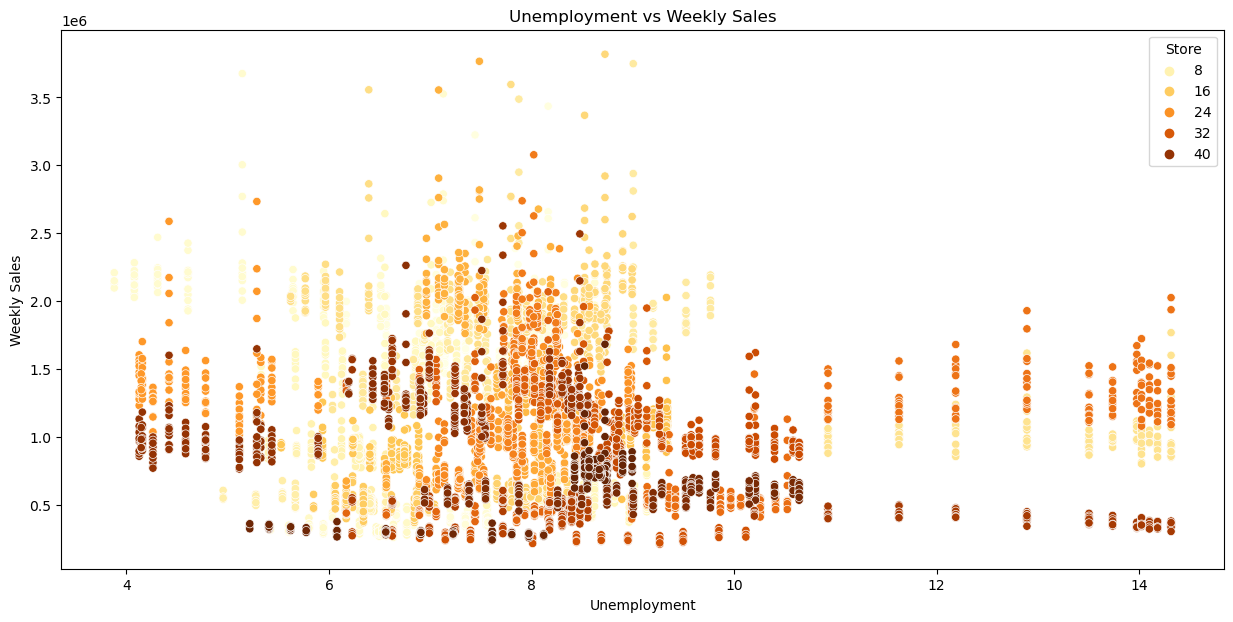

In [11]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Unemployment',y='Weekly_Sales', hue='Store',palette='YlOrBr',legend='brief')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Unemployment vs Weekly Sales')
plt.show()

In [12]:
df.sort_values(['Weekly_Sales','Store'],ascending=True)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4619     33 2010-03-12     209986.25             0        52.82       3.041   
4614     33 2010-10-29     213538.32             0        71.34       3.130   
4675     33 2011-12-30     215359.21             1        51.60       3.428   
4623     33 2010-12-31     219804.85             1        52.91       3.148   
4671     33 2011-02-12     220060.35             0        59.12       3.701   
...     ...        ...           ...           ...          ...         ...   
1762     13 2010-12-24    3595903.20             0        34.90       2.846   
527       4 2011-12-23    3676388.98             0        35.92       3.103   
1333     10 2010-12-24    3749057.69             0        57.06       3.236   
2763     20 2010-12-24    3766687.43             0        25.17       3.141   
1905     14 2010-12-24    3818686.45             0        30.59       3.141   

             CPI  Unemployment  
4619  126.731333         9.265  
4614  126.436419         9.265  
4675  130.071032         8.010  
4623  127.087677         9.265  
4671  129.845967         8.010  
...          ...           ...  
1762  126.983581         7.795  
527   129.984548         5.143  
1333  126.983581         9.003  
2763  204.637673         7.484  
1905  182.544590         8.724  

[6435 rows x 8 columns]

## from the above data manipulation we can interprete that from weekly sales of store number 33 to 40, are affected more by unemployment as compared to other stores.

In [13]:
#b. If the weekly sales show a seasonal trend, when and what could be the reason?

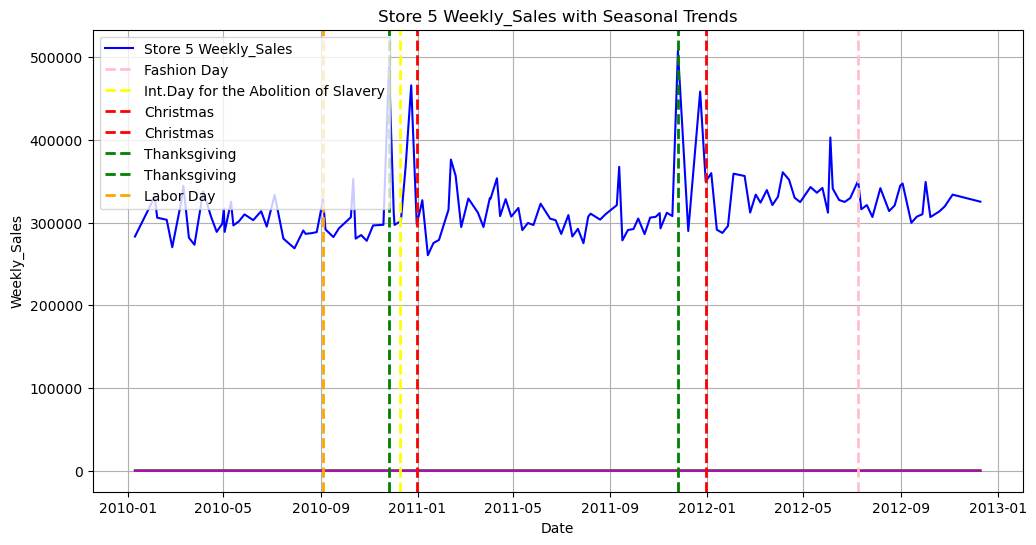

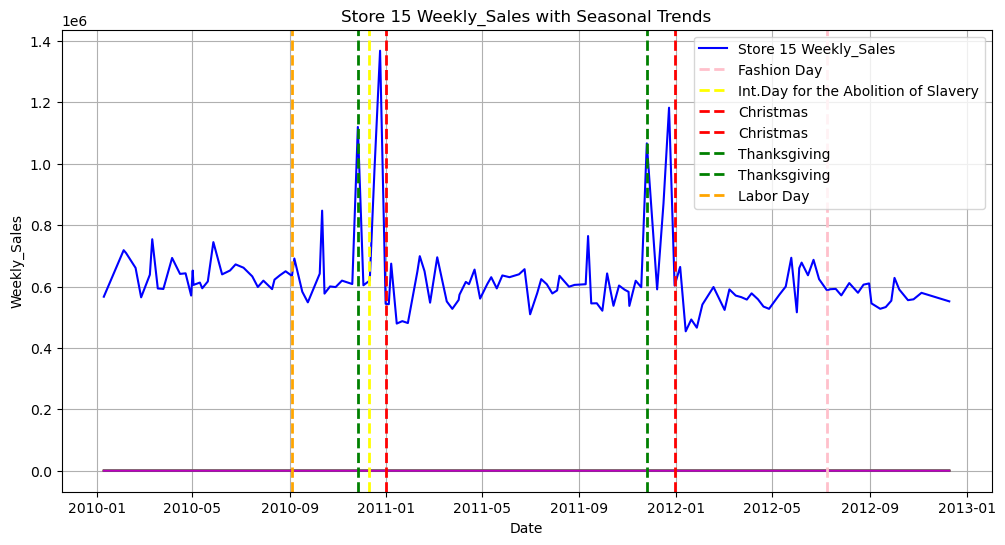

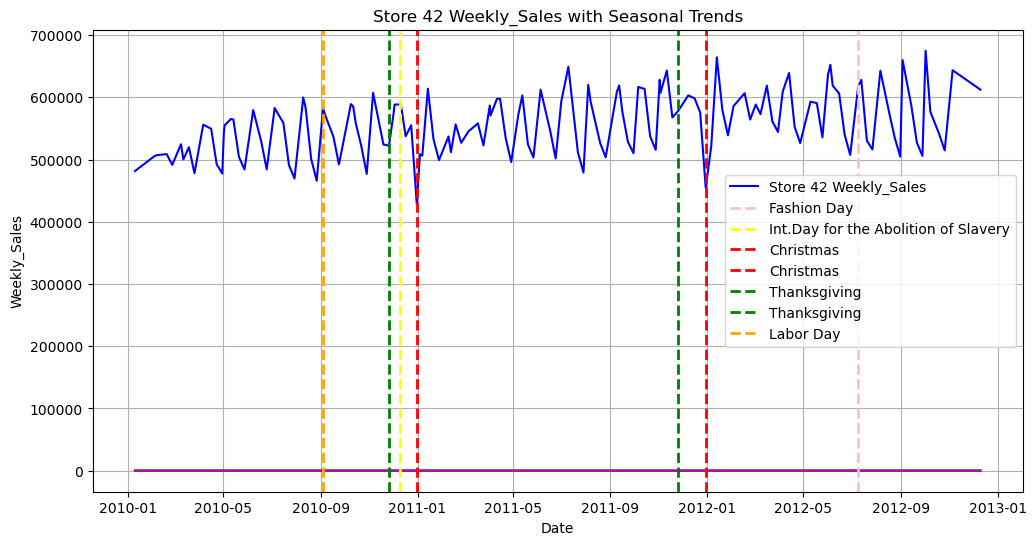

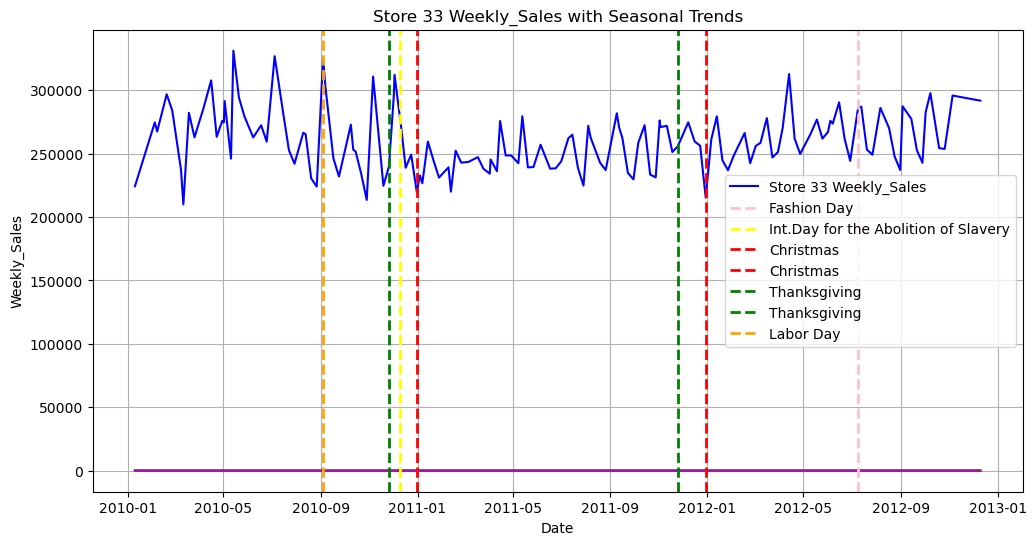

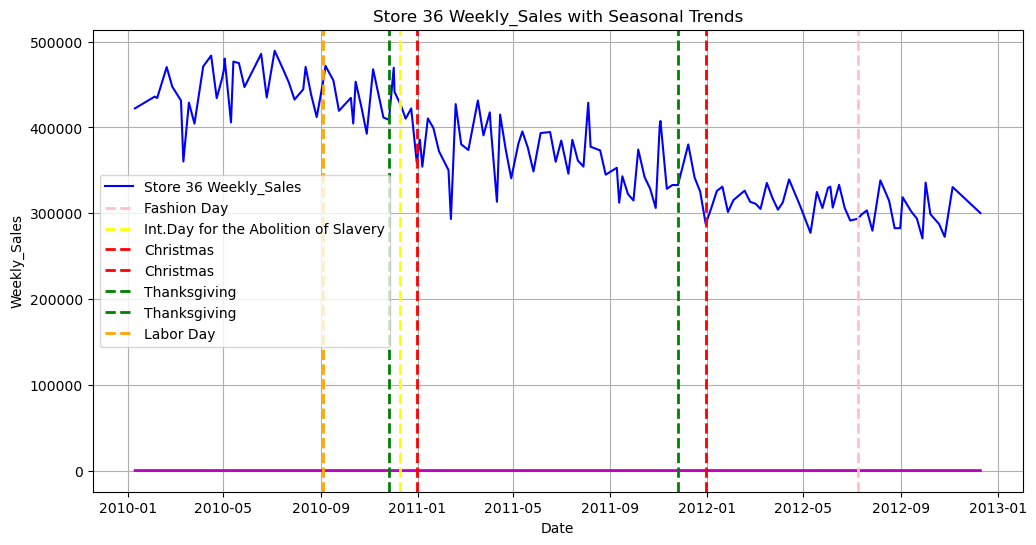

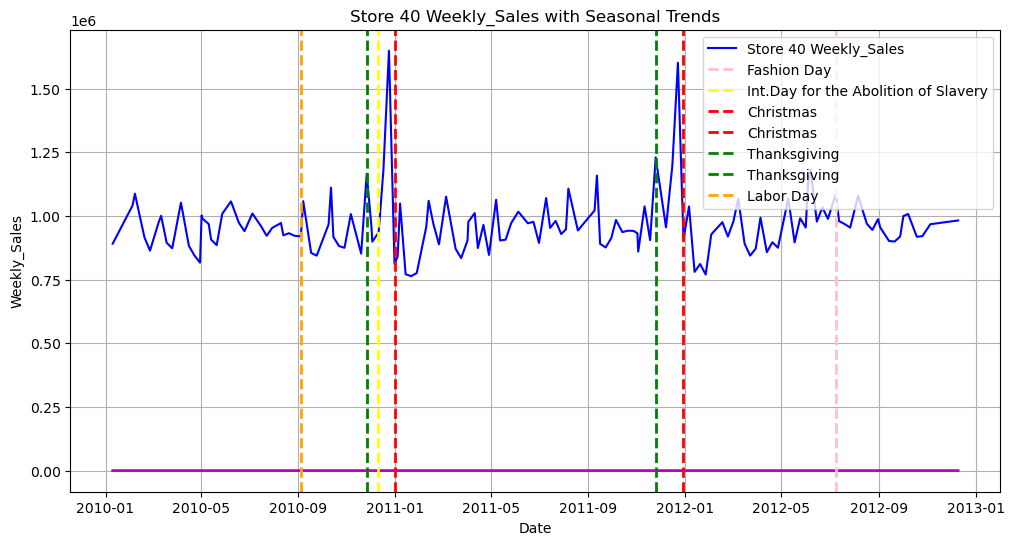

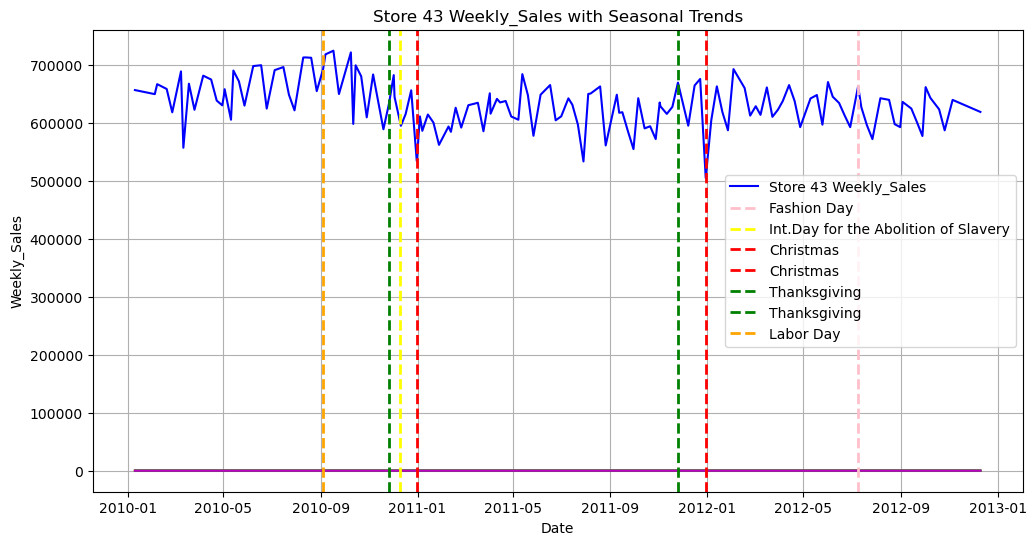

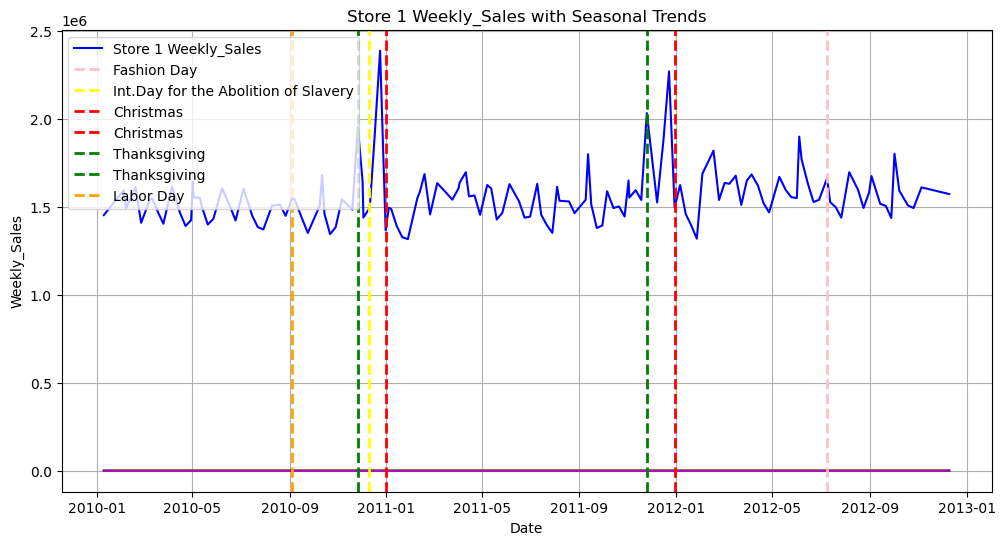

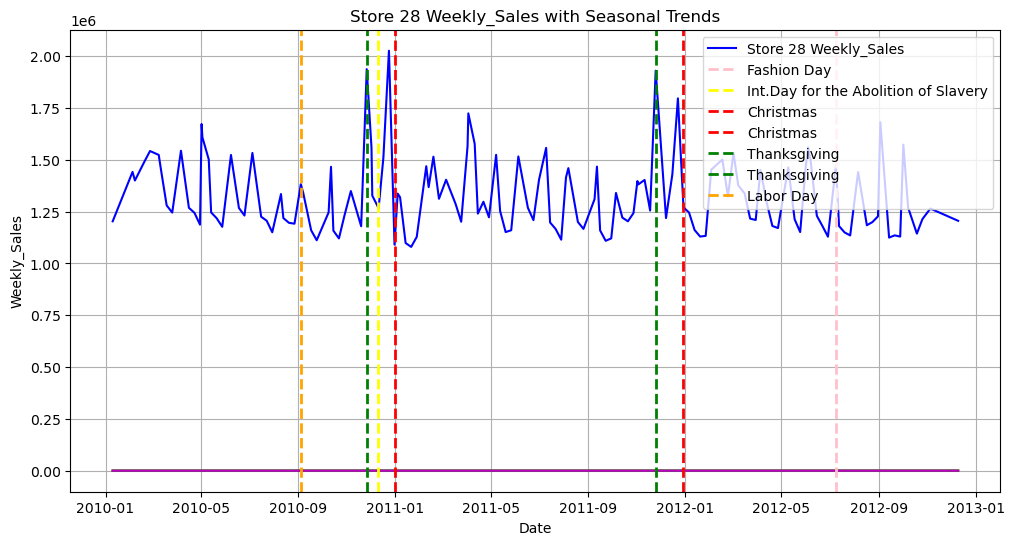

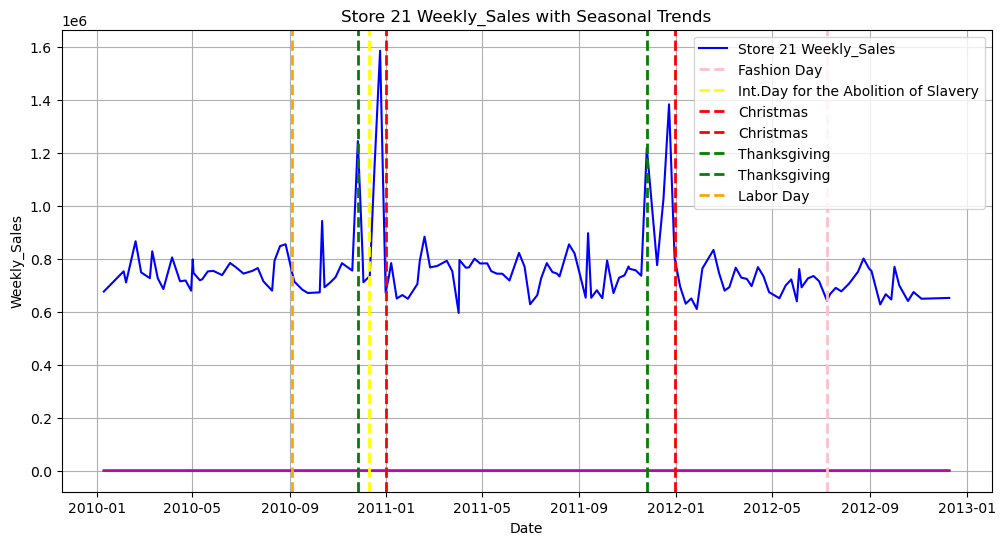

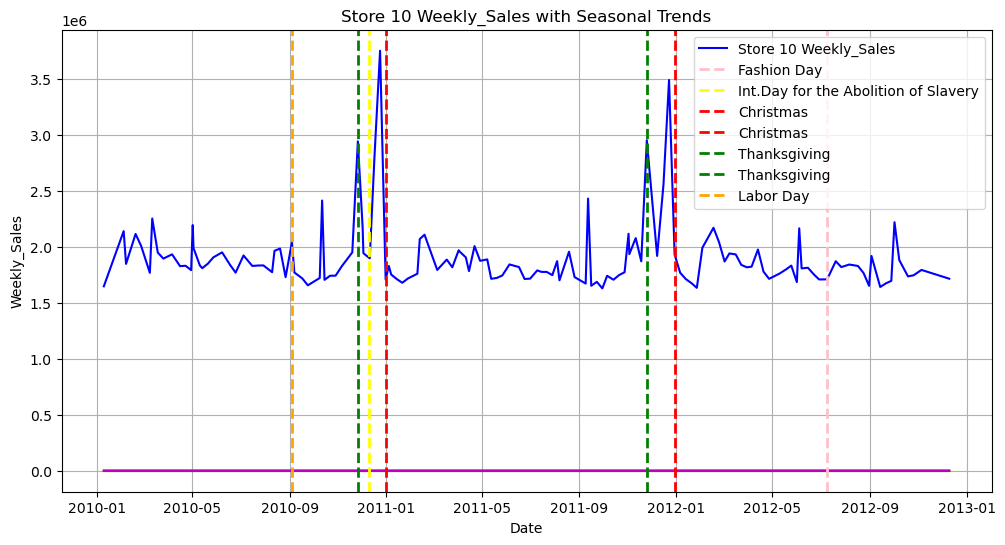

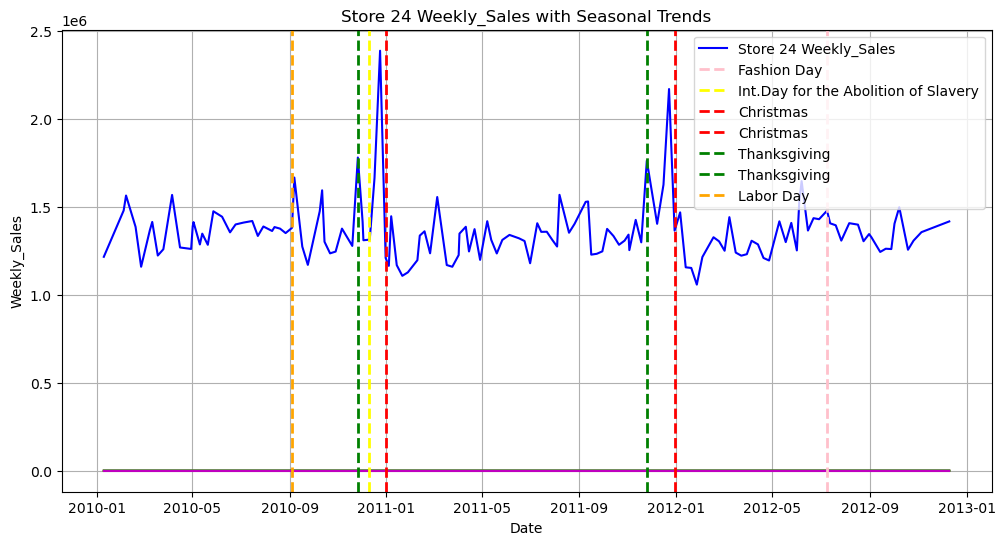

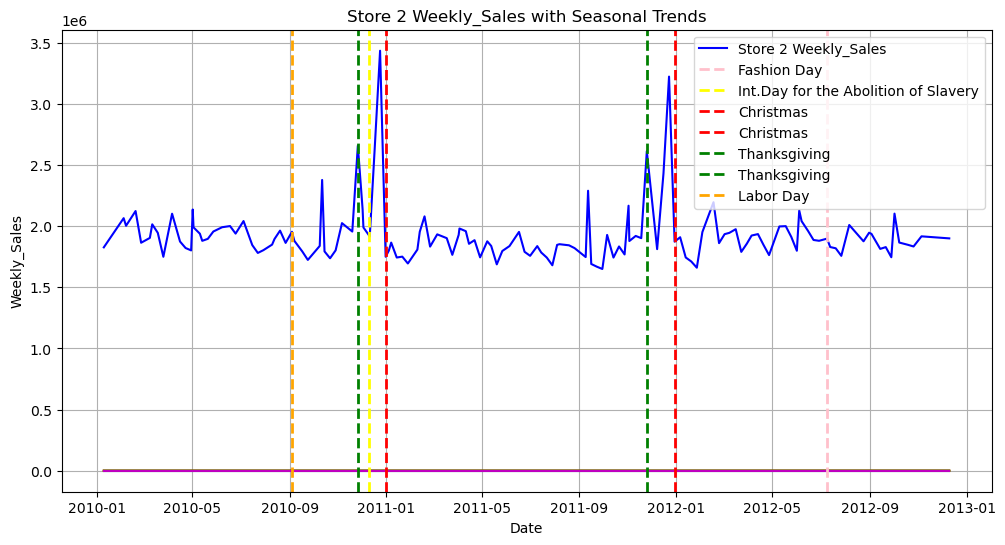

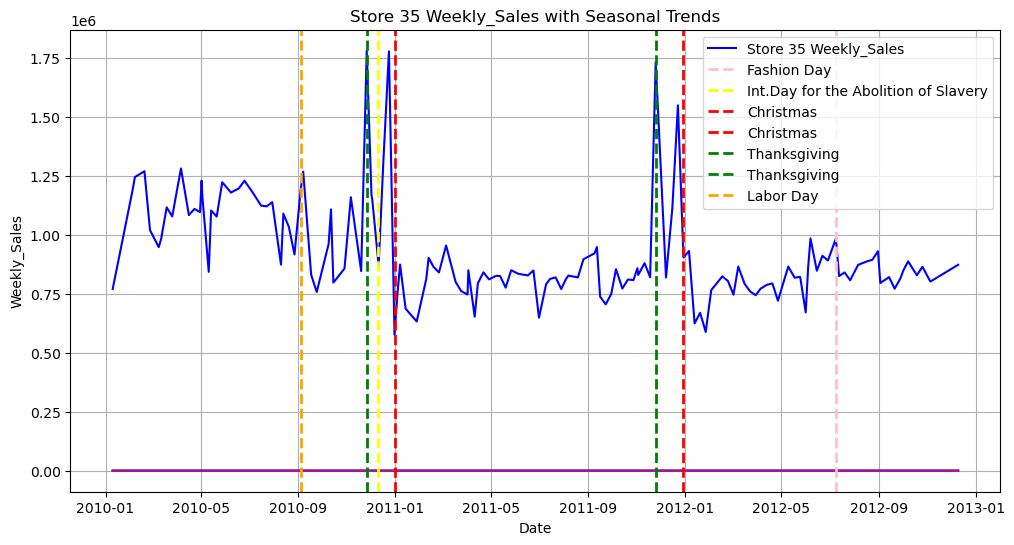

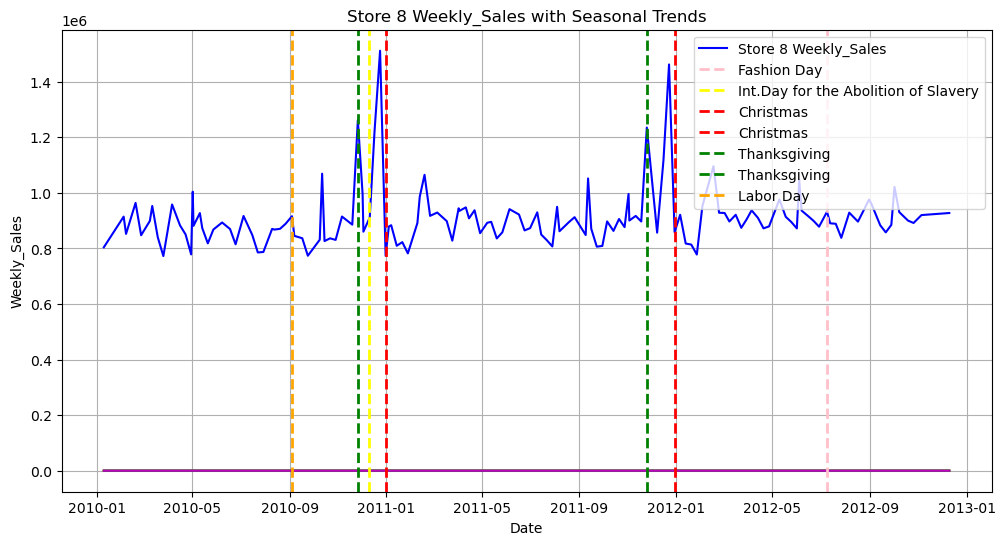

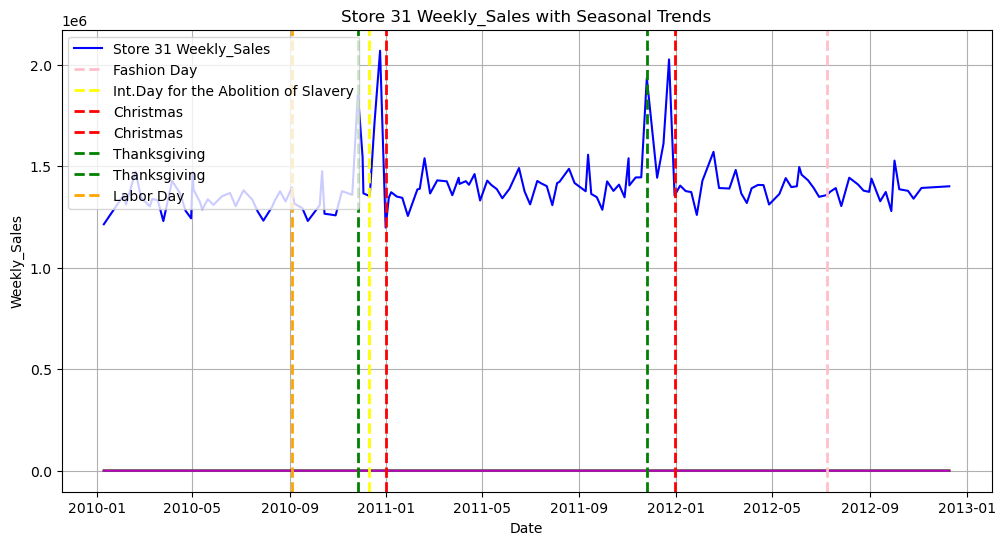

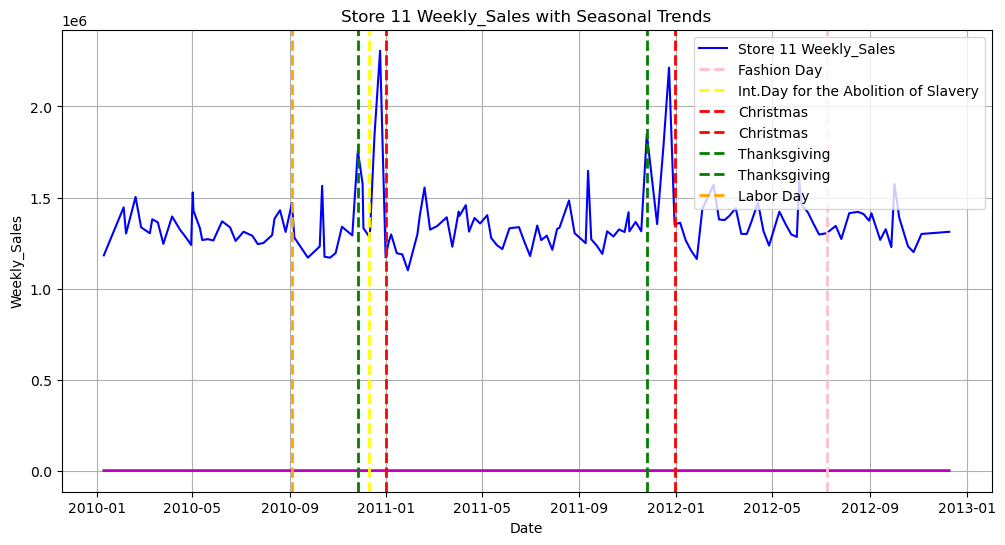

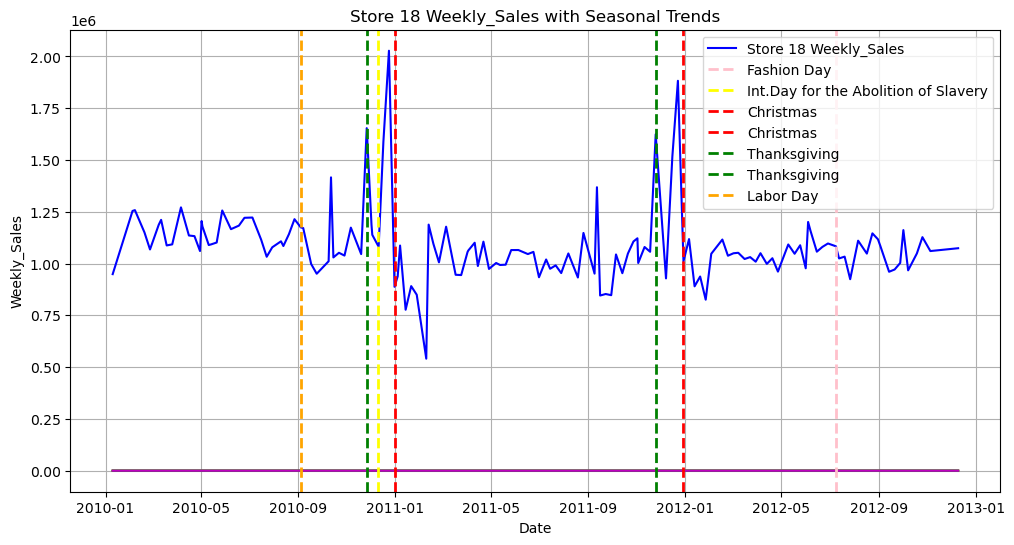

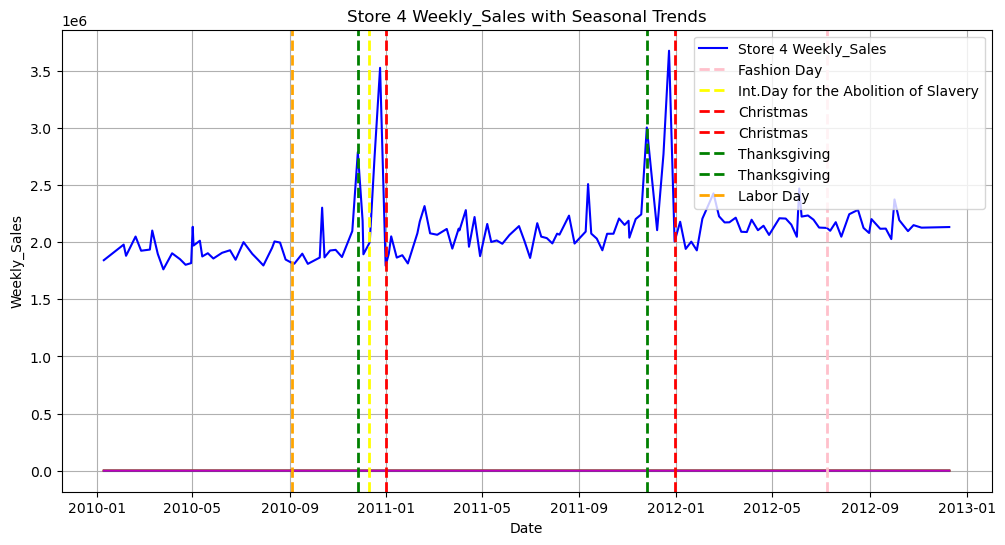

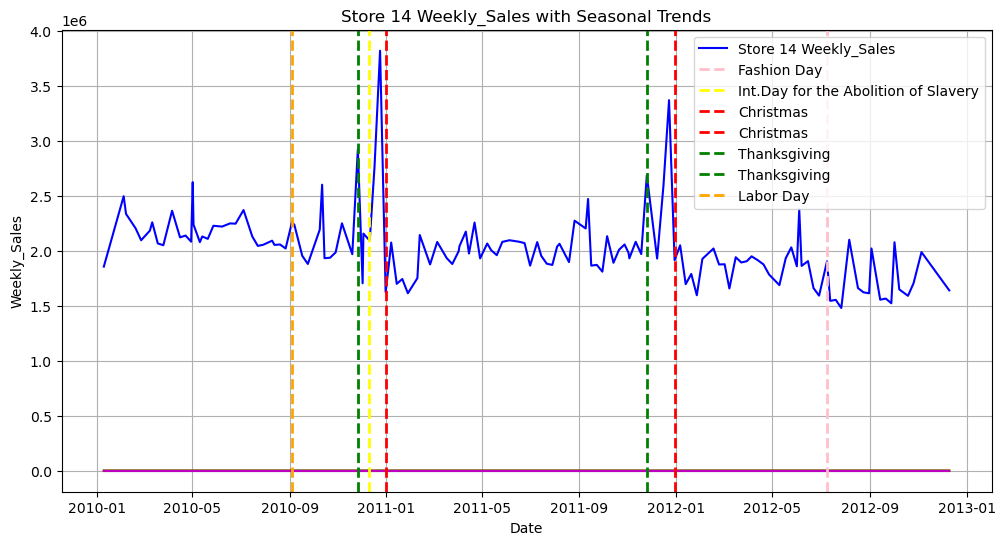

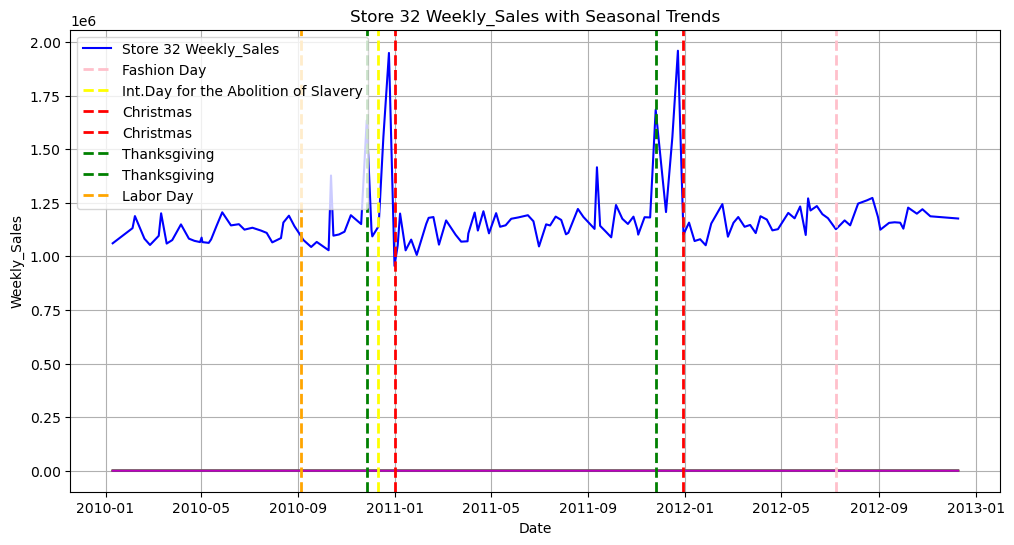

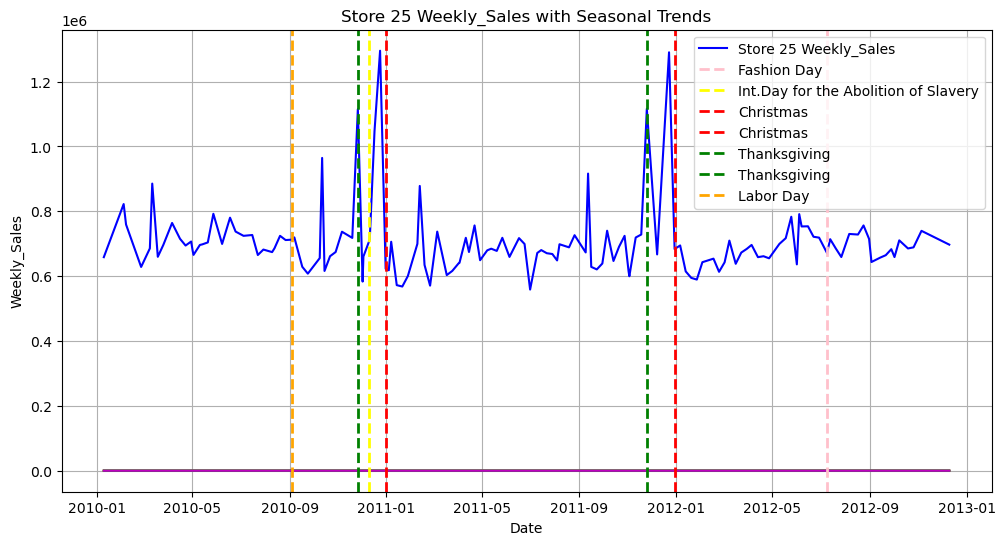

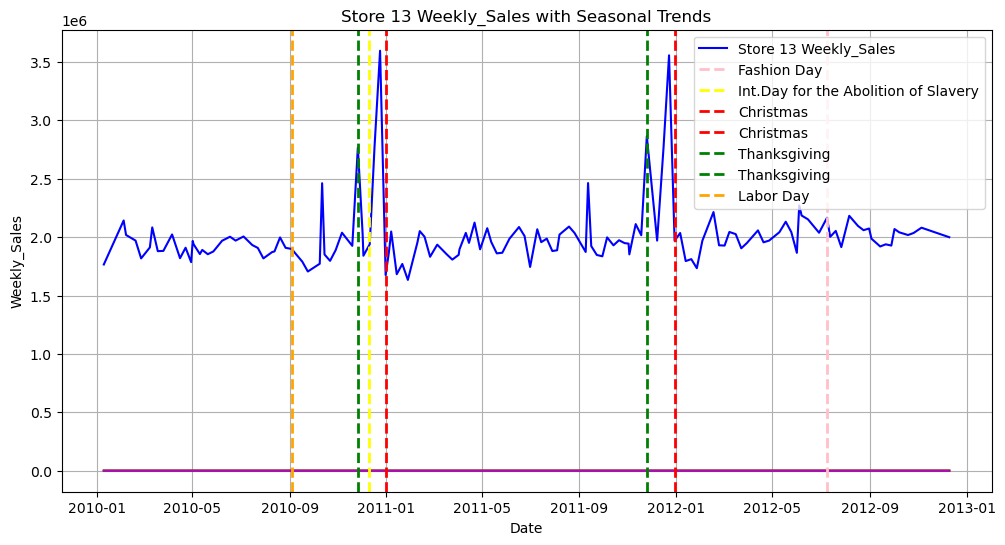

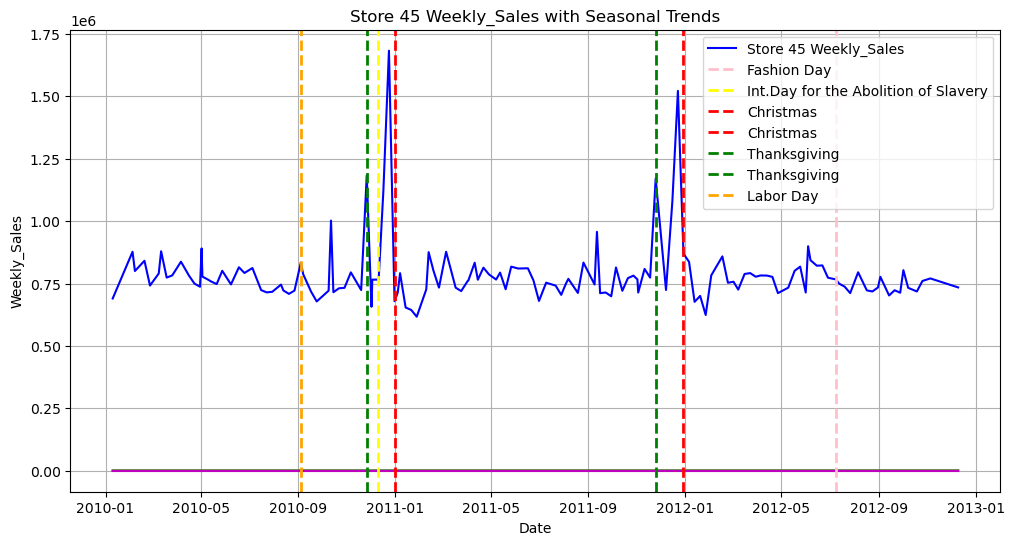

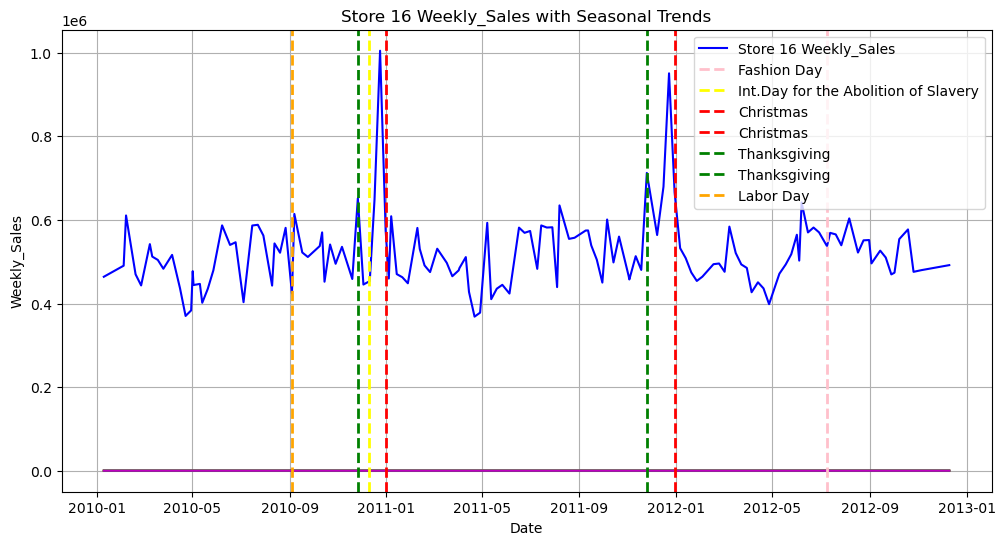

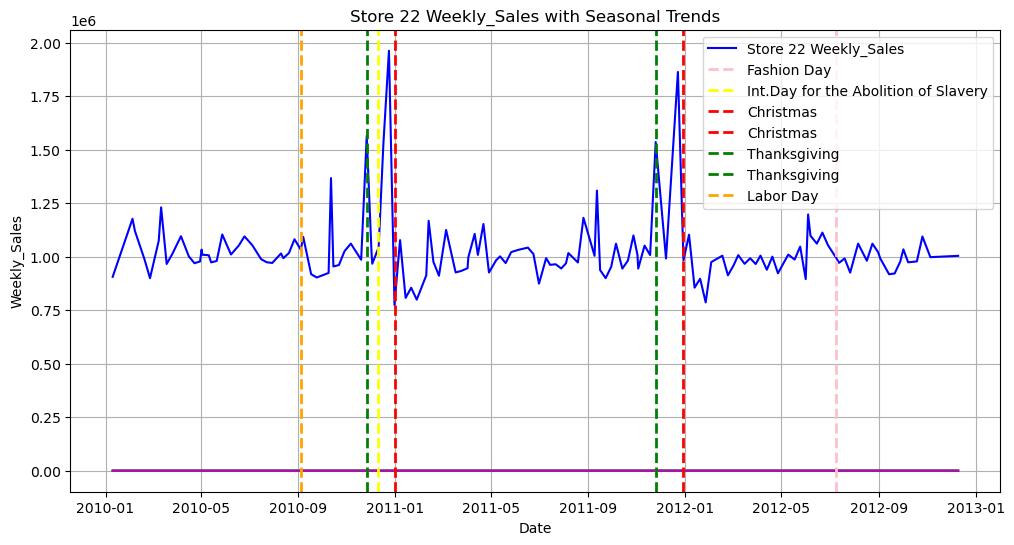

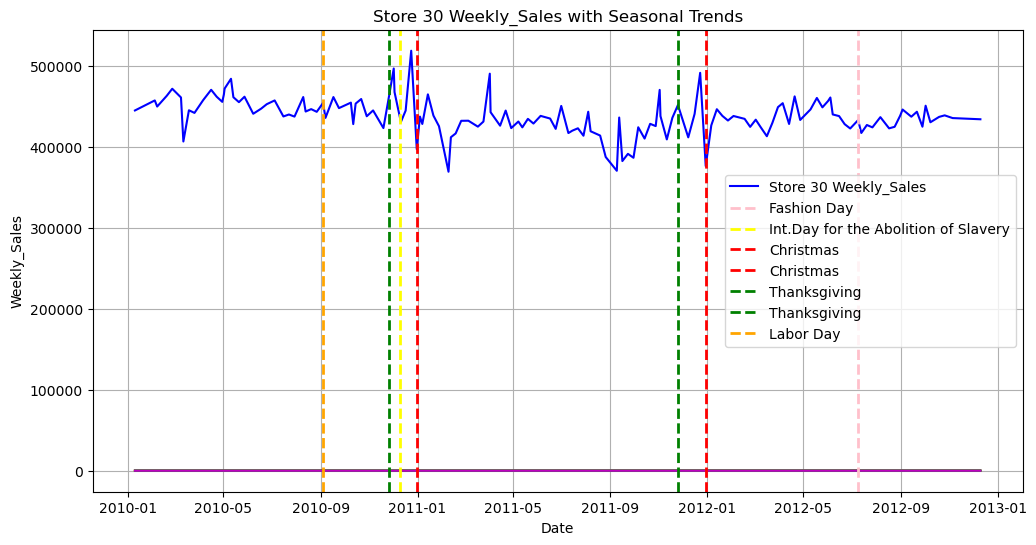

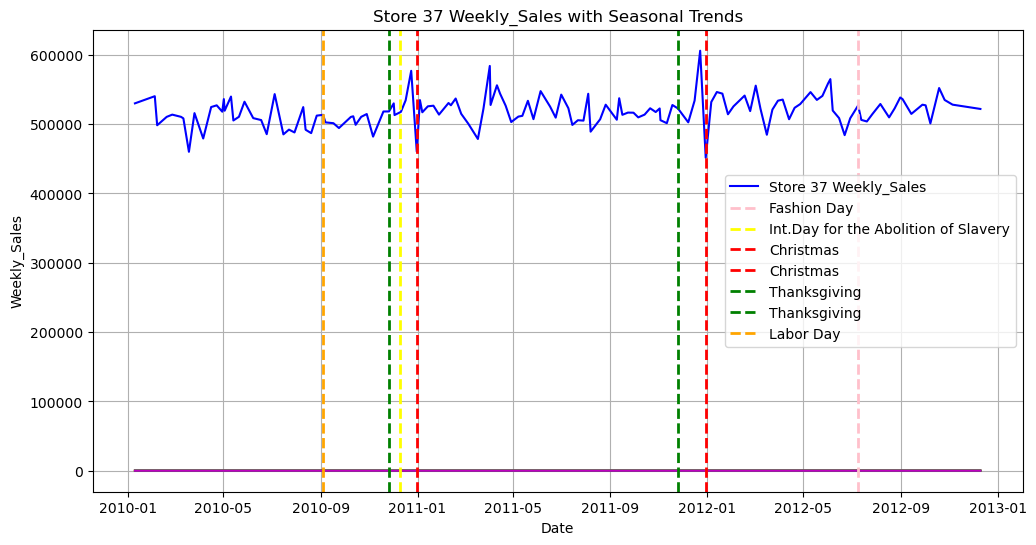

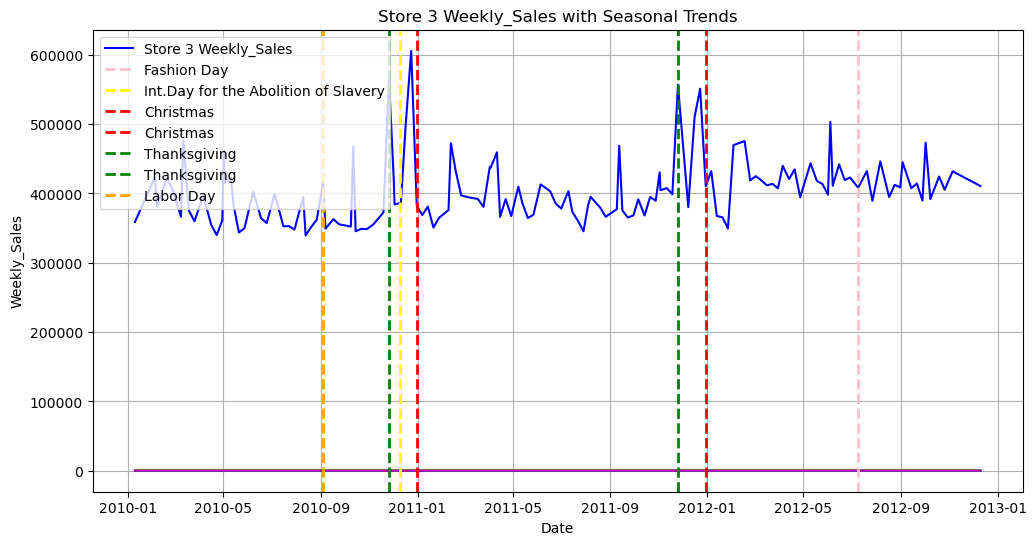

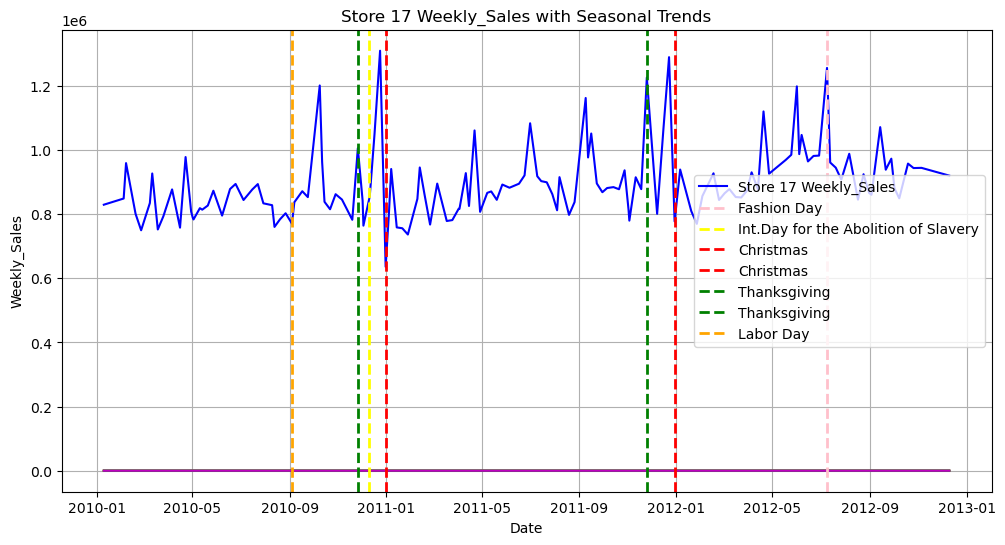

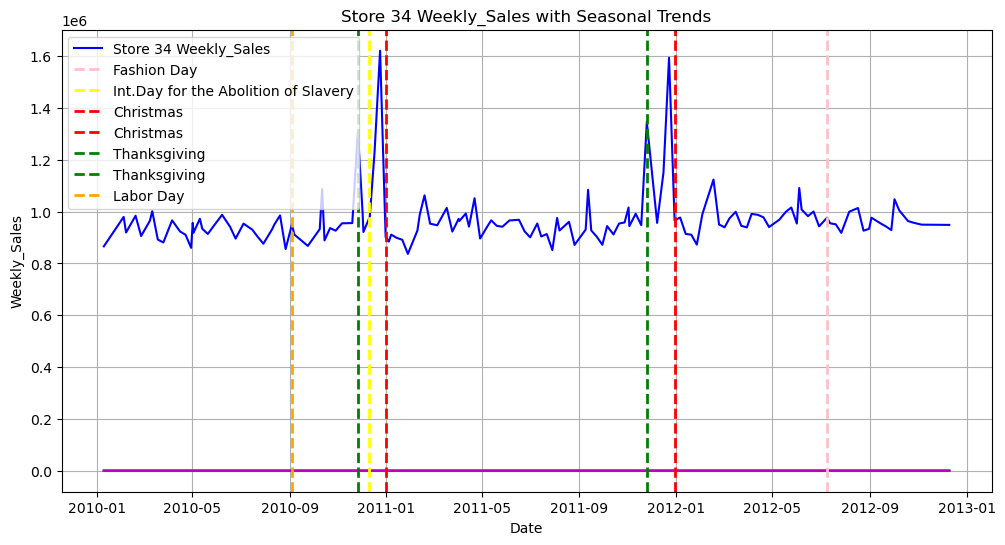

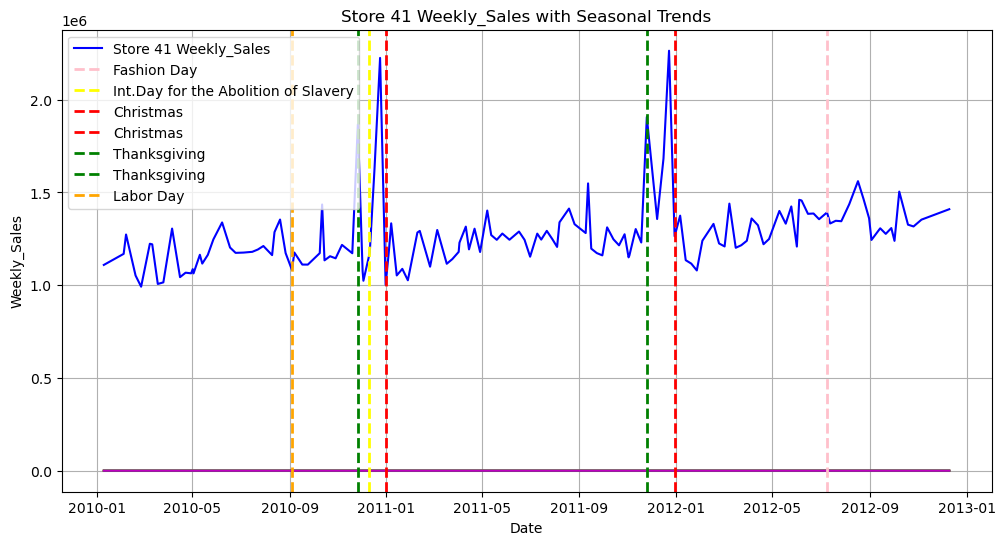

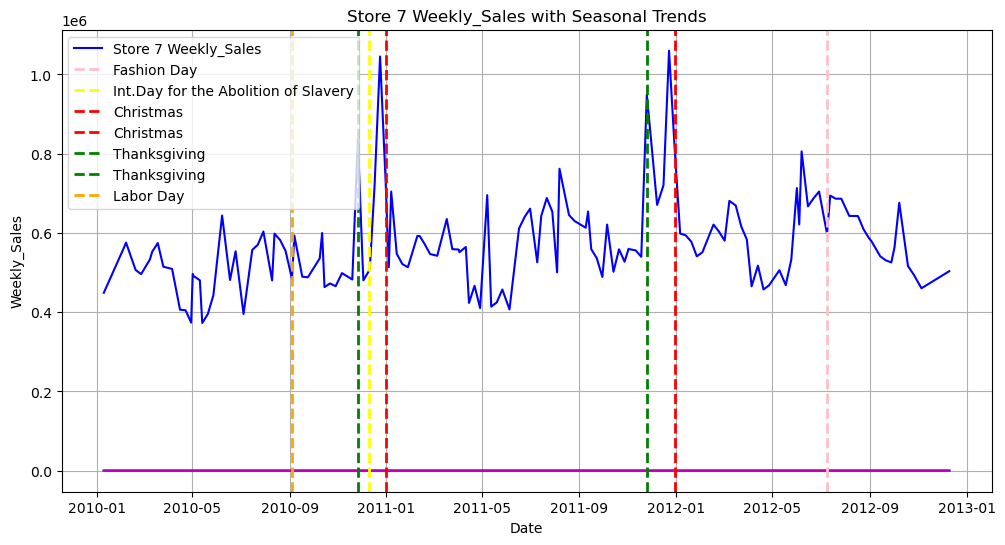

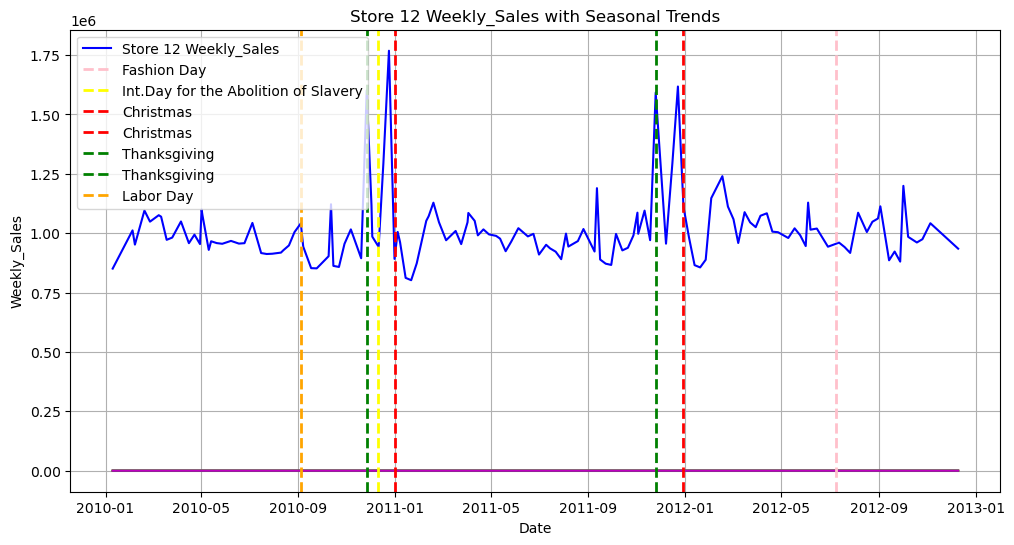

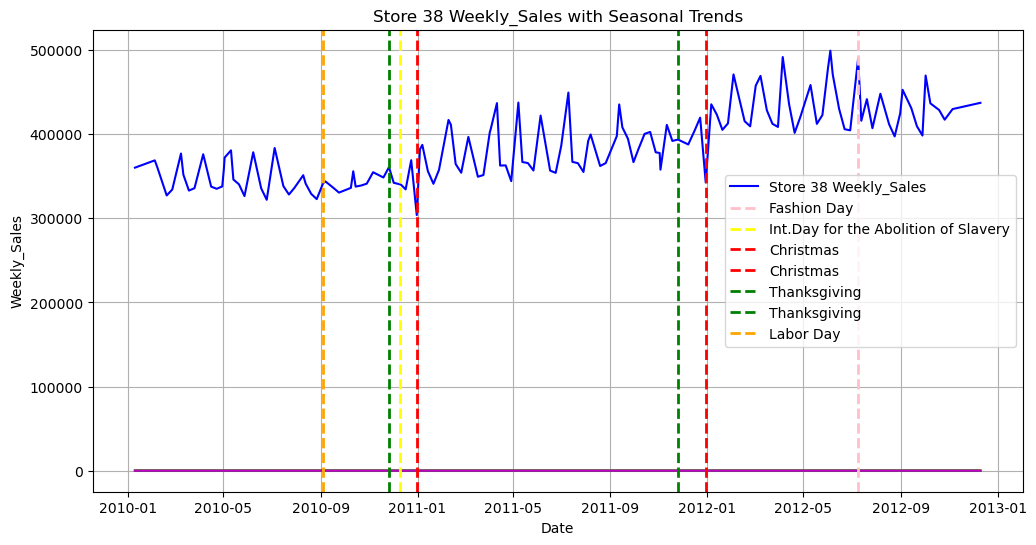

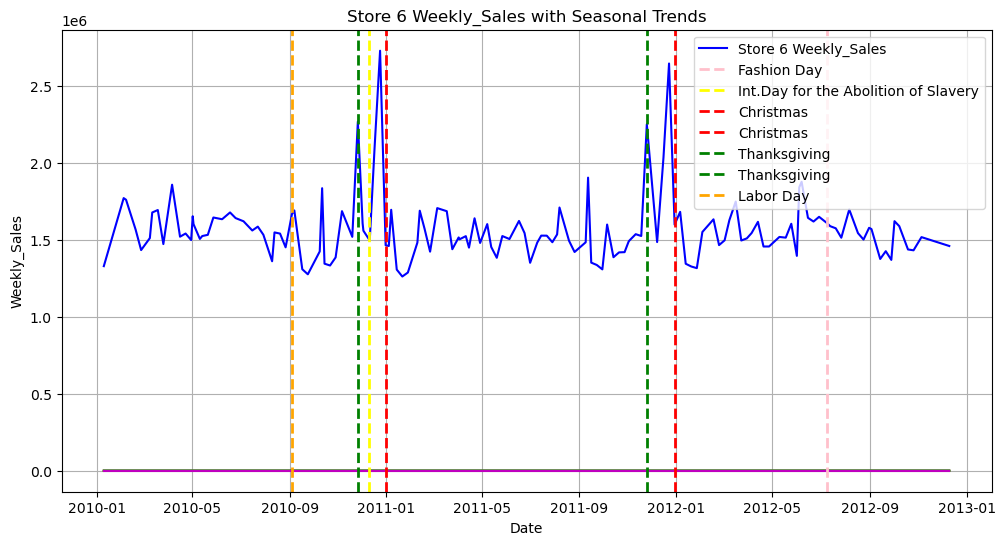

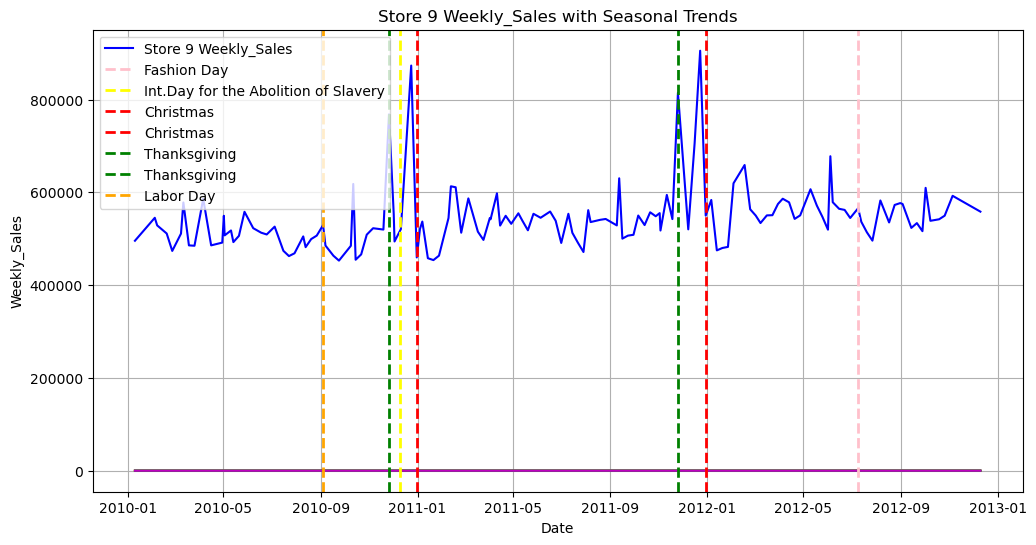

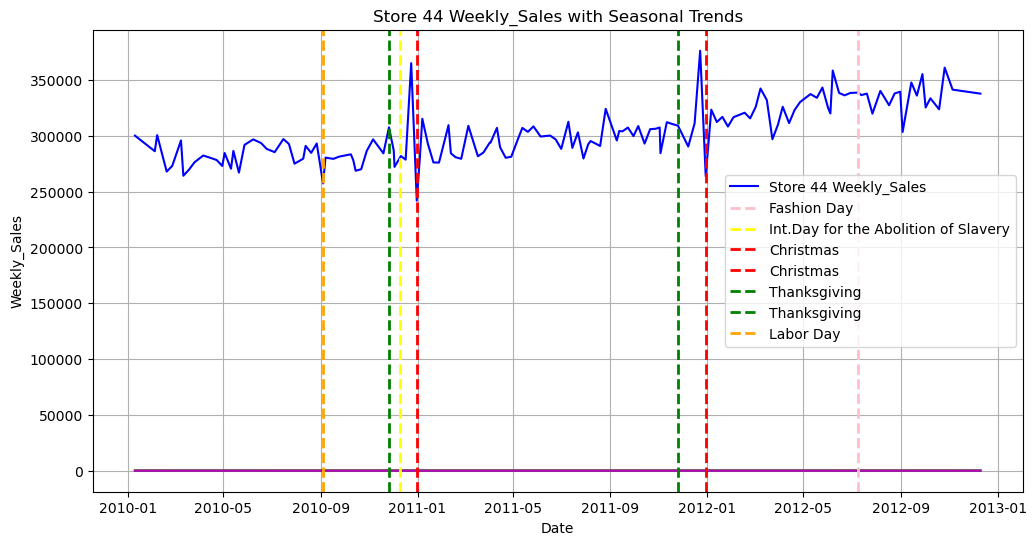

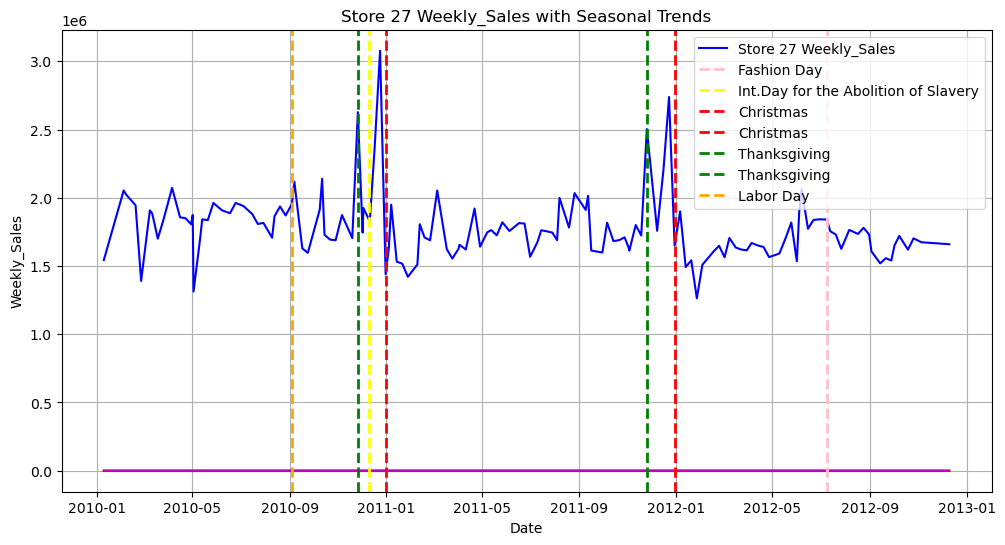

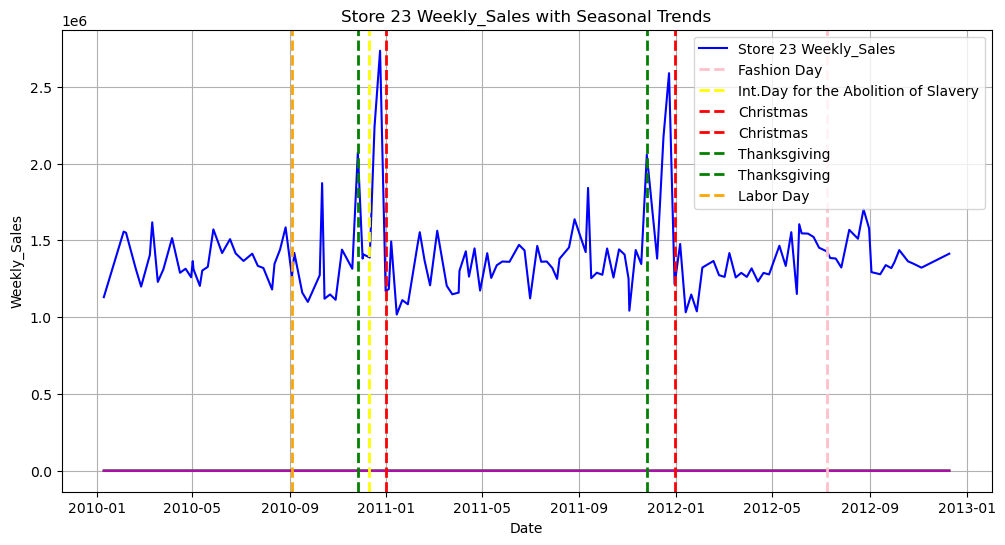

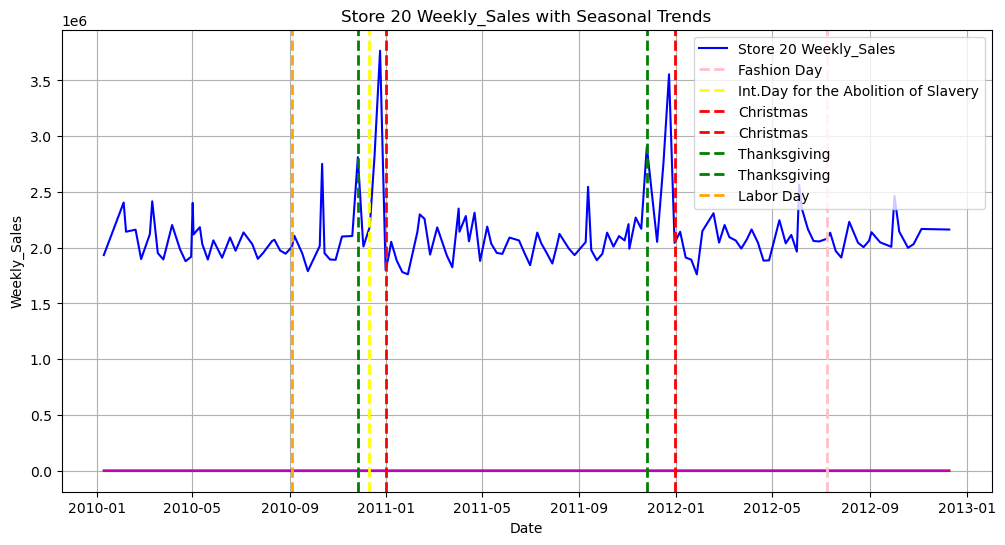

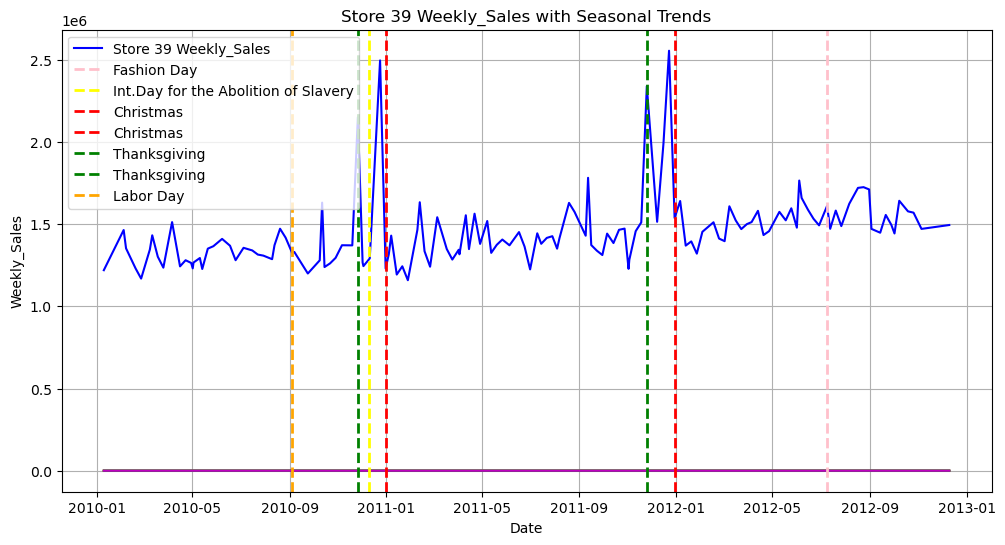

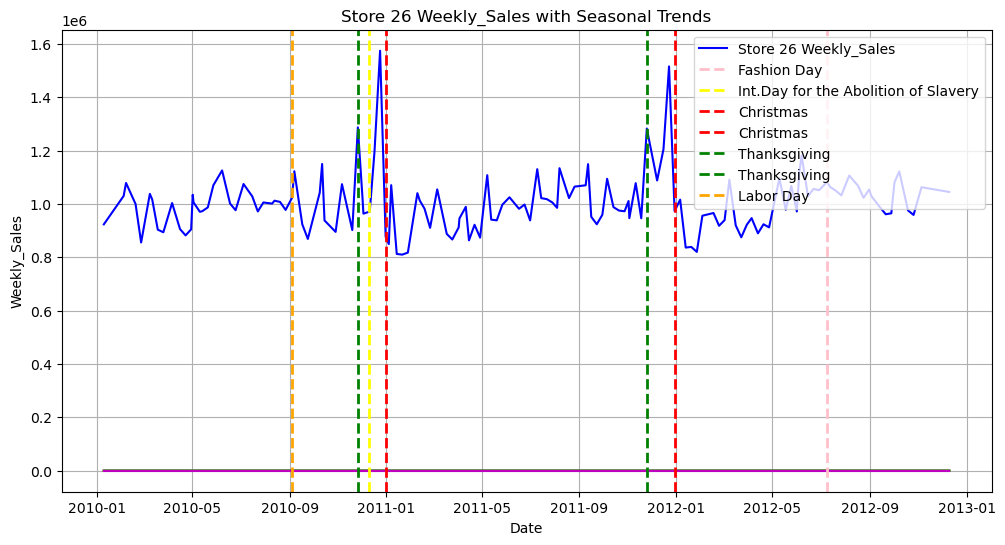

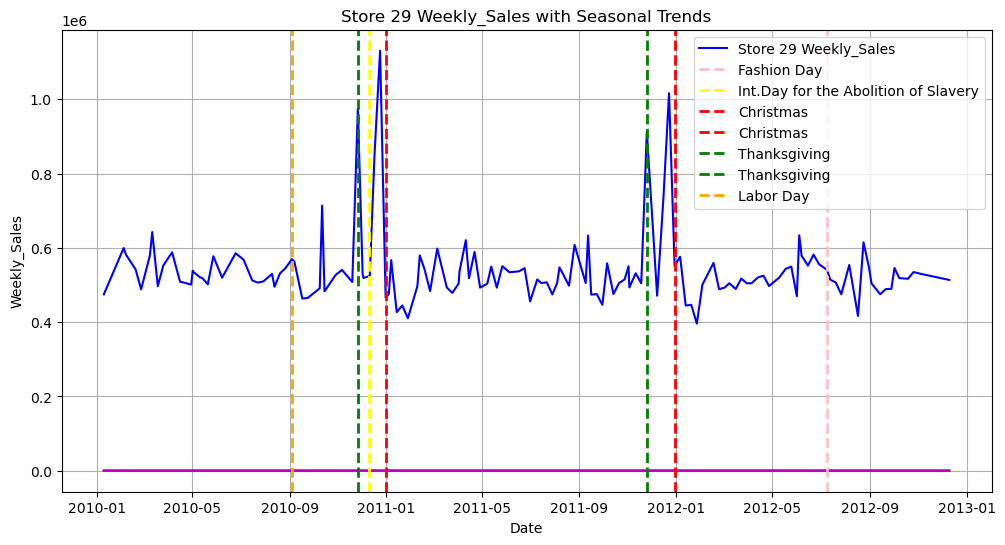

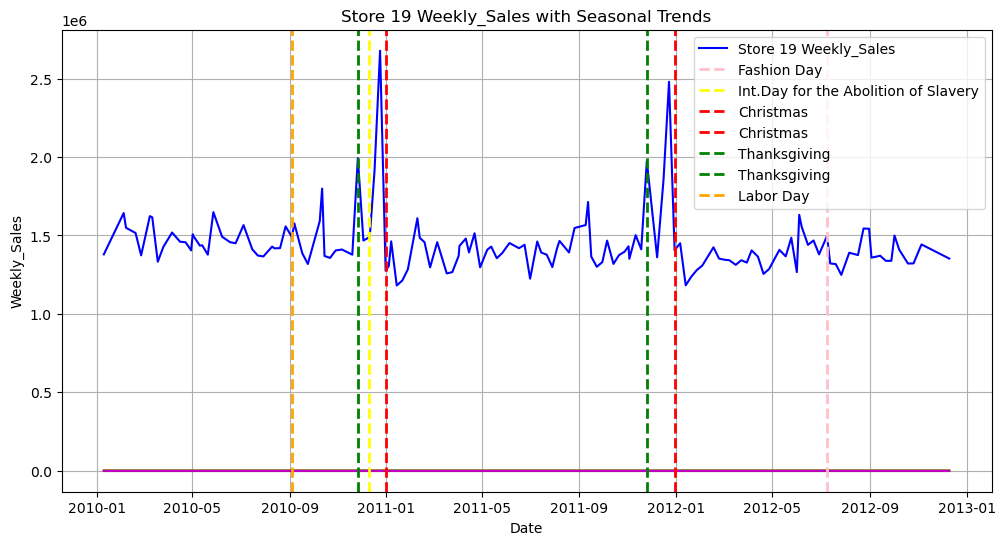

In [14]:
# Sort the data by 'Date'
df = df.sort_values(by='Date')

# Iterate through each store
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]

 # Set 'Date' as the index
    store_data.set_index('Date', inplace=True)

# Plot the weekly sales data for each store to identify seasonal trends
    plt.figure(figsize=(12, 6))
    plt.plot(store_data['Weekly_Sales'], label=f'Store {store} Weekly_Sales', color='blue')
    plt.plot(store_data['Holiday_Flag'], color='Orange')
    plt.plot(store_data['Temperature'], color='red')
    plt.plot(store_data['Fuel_Price'], color='c')
    plt.plot(store_data['CPI'], color='g')
    plt.plot(store_data['Unemployment'], color='m')

    plt.title(f'Store {store} Weekly_Sales with Seasonal Trends')
    plt.xlabel('Date')
    plt.ylabel('Weekly_Sales')
    plt.grid(True)

    # vertical lines to indicate potential seasonal reasons (e.g., holidays)
    plt.axvline(pd.to_datetime ('2012-07-09'), color='pink', linestyle='--', label="Fashion Day", linewidth=2)
    plt.axvline(pd.to_datetime ('2010-12-10'), color='yellow', linestyle='--', label="Int.Day for the Abolition of Slavery", linewidth=2)
    plt.axvline(pd.to_datetime ('2010-12-31'), color='red', linestyle='--', label="Christmas", linewidth=2)
    plt.axvline(pd.to_datetime ('2011-12-30'), color='red', linestyle='--', label="Christmas", linewidth=2)
    plt.axvline(pd.to_datetime('2010-11-26'), color='green', linestyle='--', label='Thanksgiving', linewidth=2)
    plt.axvline(pd.to_datetime('2011-11-25'), color='green', linestyle='--', label='Thanksgiving', linewidth=2)
    plt.axvline(pd.to_datetime('2010-09-04'), color='orange', linestyle='--', label='Labor Day', linewidth=2)

    plt.legend()
    plt.show()

In [15]:
#c. Does temperature affect the weekly sales in any manner?

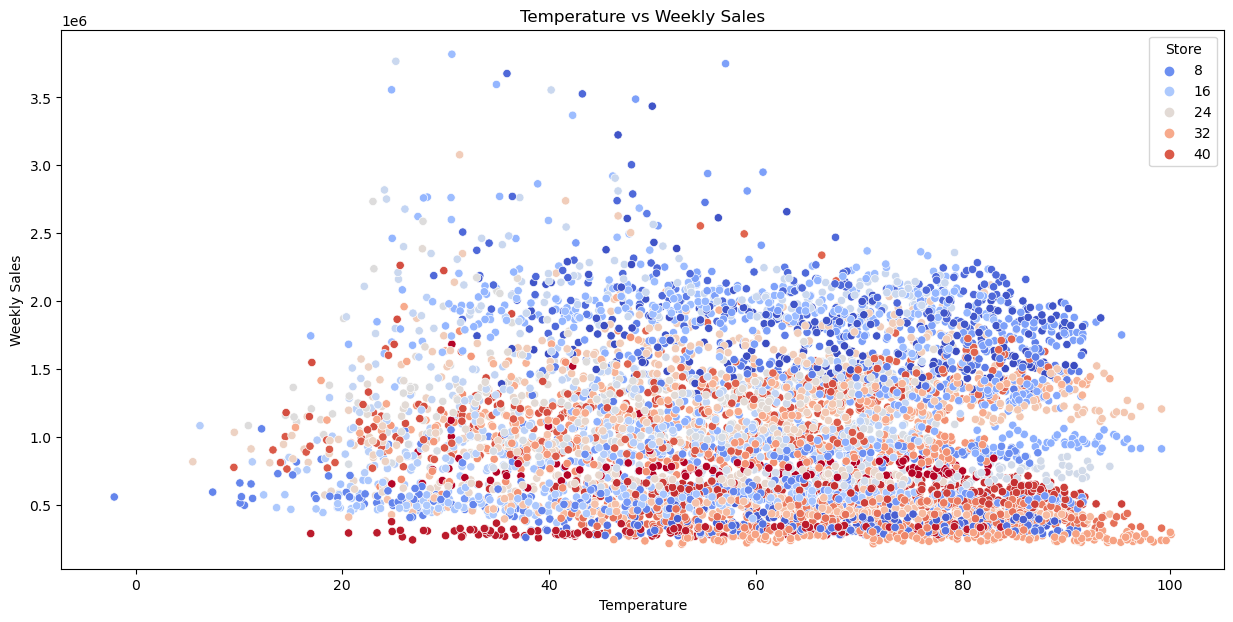

In [16]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales', hue='Store',palette='coolwarm',legend='brief')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()

## From the above we can conclude that any increase or decrease in the temperature weekly sales decreases.

In [17]:
#d. How is the Consumer Price index affecting the weekly sales of various stores?

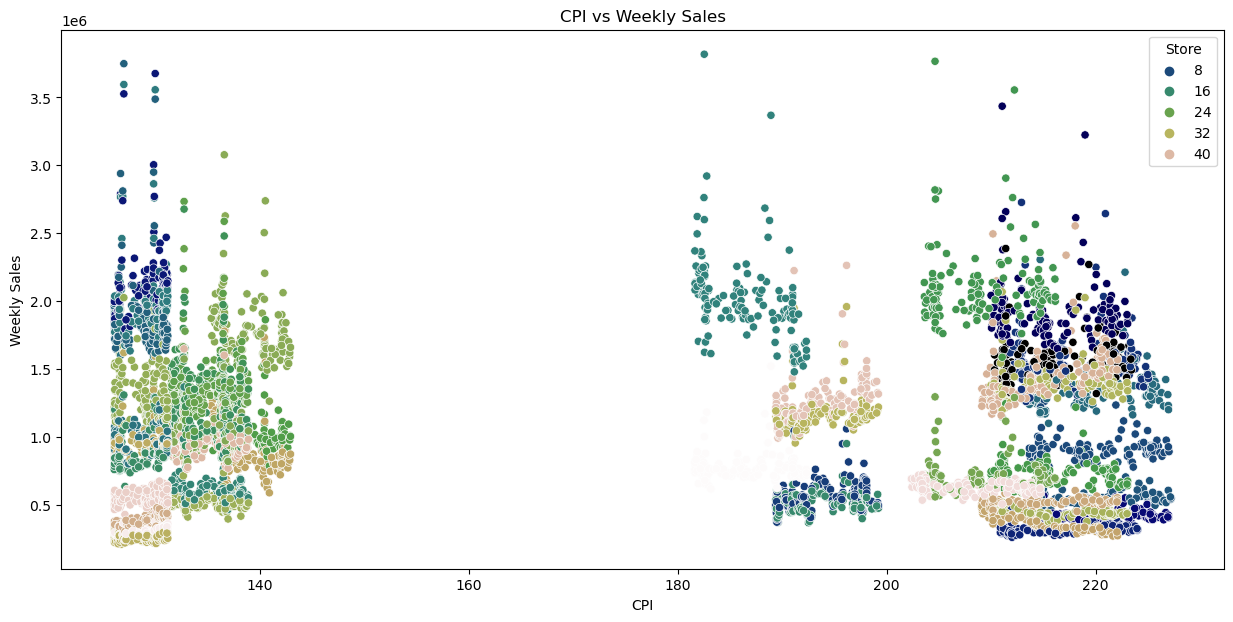

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='CPI',y='Weekly_Sales', hue='Store',palette='gist_earth',legend='brief')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('CPI vs Weekly Sales')
plt.show()

# with low CPI the weekly sales of store number 20 to 30 is more whereas as the CPI increases the weekly sales of store number 8 to 19 is increasing, additionally it is noted that store number 40 weekly sales are increasing with increasing CPI.

In [19]:
#e. Top performing stores according to the historical data.

<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

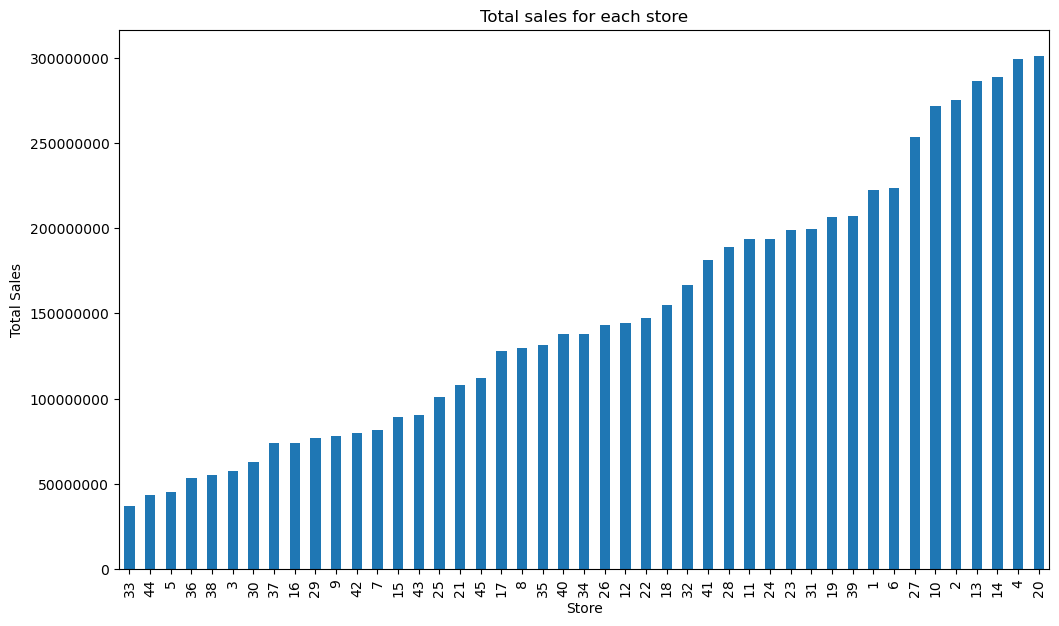

In [20]:
total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_array = np.array(total_sales)
plt.figure(figsize=(12,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

## From the above we can conclude that store no 20 has the highest weekly sales and store no 33 has the lowest weekly sales in the past.

In [21]:
# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [22]:
#calculate the total sales of each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Calculate the worst performing store
worst_performing_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]

#Calculate the best performing store
best_performing_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]

#Difference between the best performing store and worst performing store

difference = best_performing_store['Weekly_Sales'] - worst_performing_store['Weekly_Sales']

print('The worst performing store is:')
print(worst_performing_store)

print('\nThe best performing store is:')
print(best_performing_store)

print('\nThe difference in best and worst performing store is:')
print(difference)

The worst performing store is:
Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64

The best performing store is:
Store           2.000000e+01
Weekly_Sales    3.013978e+08
Name: 19, dtype: float64

The difference in best and worst performing store is:
264237570.49999997


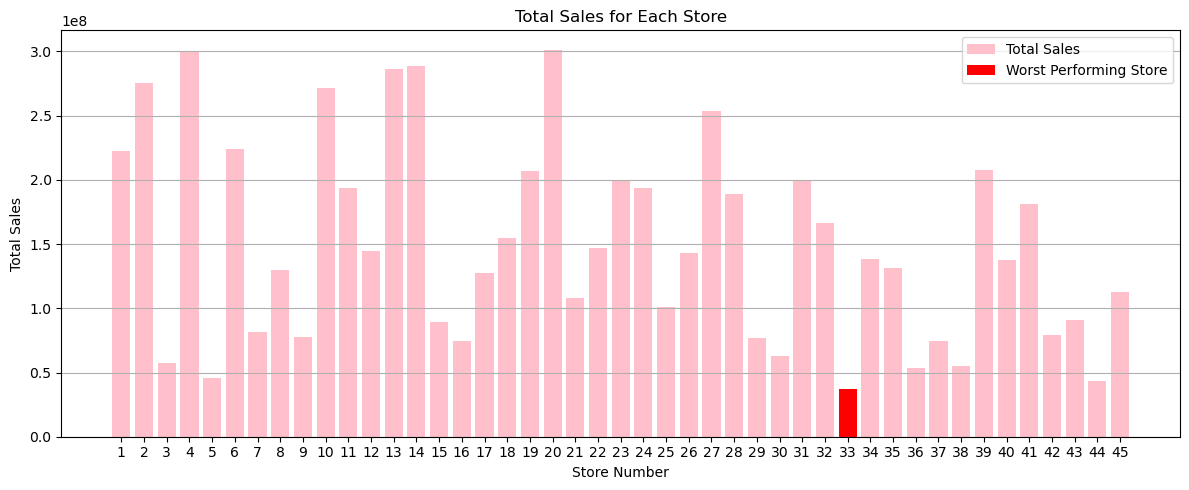

In [23]:
# Create a bar chart to visualize the total sales for all stores
plt.figure(figsize=(12,5))
plt.bar(store_sales['Store'], store_sales['Weekly_Sales'], color='pink', label='Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Store')
plt.xticks(store_sales['Store'])
plt.grid(axis='y')

# Highlight the worst-performing store with a different color
plt.bar(worst_performing_store['Store'], worst_performing_store['Weekly_Sales'], color='r', label='Worst Performing Store')
plt.legend()

# Show the bar chart
plt.tight_layout()
plt.show()

2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [24]:
df.index

Int64Index([ 606, 2036, 5897, 4610, 5039, 5611, 6040,   34, 3895, 2894,
            ...
            5288,  998, 3143,  569, 2857, 5860, 2285, 1427, 3572,  283],
           dtype='int64', length=6435)

In [25]:
df.index = df['Date']

In [26]:
df.index

DatetimeIndex(['2010-01-10', '2010-01-10', '2010-01-10', '2010-01-10',
               '2010-01-10', '2010-01-10', '2010-01-10', '2010-01-10',
               '2010-01-10', '2010-01-10',
               ...
               '2012-12-10', '2012-12-10', '2012-12-10', '2012-12-10',
               '2012-12-10', '2012-12-10', '2012-12-10', '2012-12-10',
               '2012-12-10', '2012-12-10'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

<AxesSubplot:xlabel='Date'>

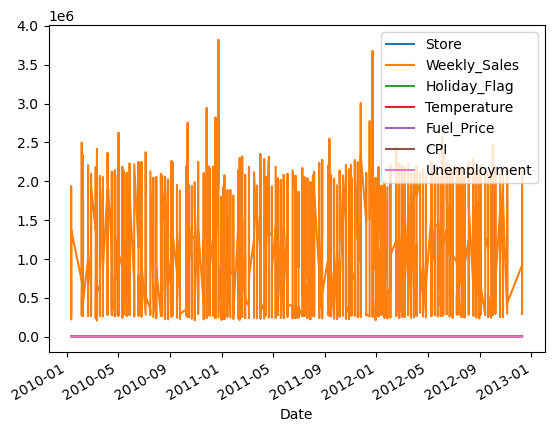

In [27]:
df.plot(x='Date')

In [28]:
#checking if data is stationary
from statsmodels.tsa.stattools import adfuller

In [29]:
result = adfuller(df['Weekly_Sales'])

In [30]:
pval=result[1]

In [31]:
pval # this shows data is stationary

0.0

In [32]:
rolling_mean = df.rolling(window=12).mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_14552\3455774029.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = df.rolling(window=12).mean()


In [33]:
rolling_mean_detrended = df-rolling_mean

In [34]:
rolling_mean_detrended[:13] #checking for the null values

CPI  Date  Fuel_Price  Holiday_Flag      Store  Temperature  \
Date                                                                            
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10        NaN   NaN         NaN           NaN        NaN          NaN   
2010-01-10 -29.949157   NaN    0.058333           0.0  -0.833333    -8.379167   
2010-01-10  48.698673   NaN   -0.178667           0.0 -22.583333    -5.864167   

            Unemployment   Weekly_Sales  
Date                                     
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10     -0.447333  405180.914167  
2010-01-10     -0.675583  888659.618333

In [35]:
store_data_mean=store_data.rolling(window=12).mean().round(4)
store_data_std=store_data.rolling(window=12).std().round(4)

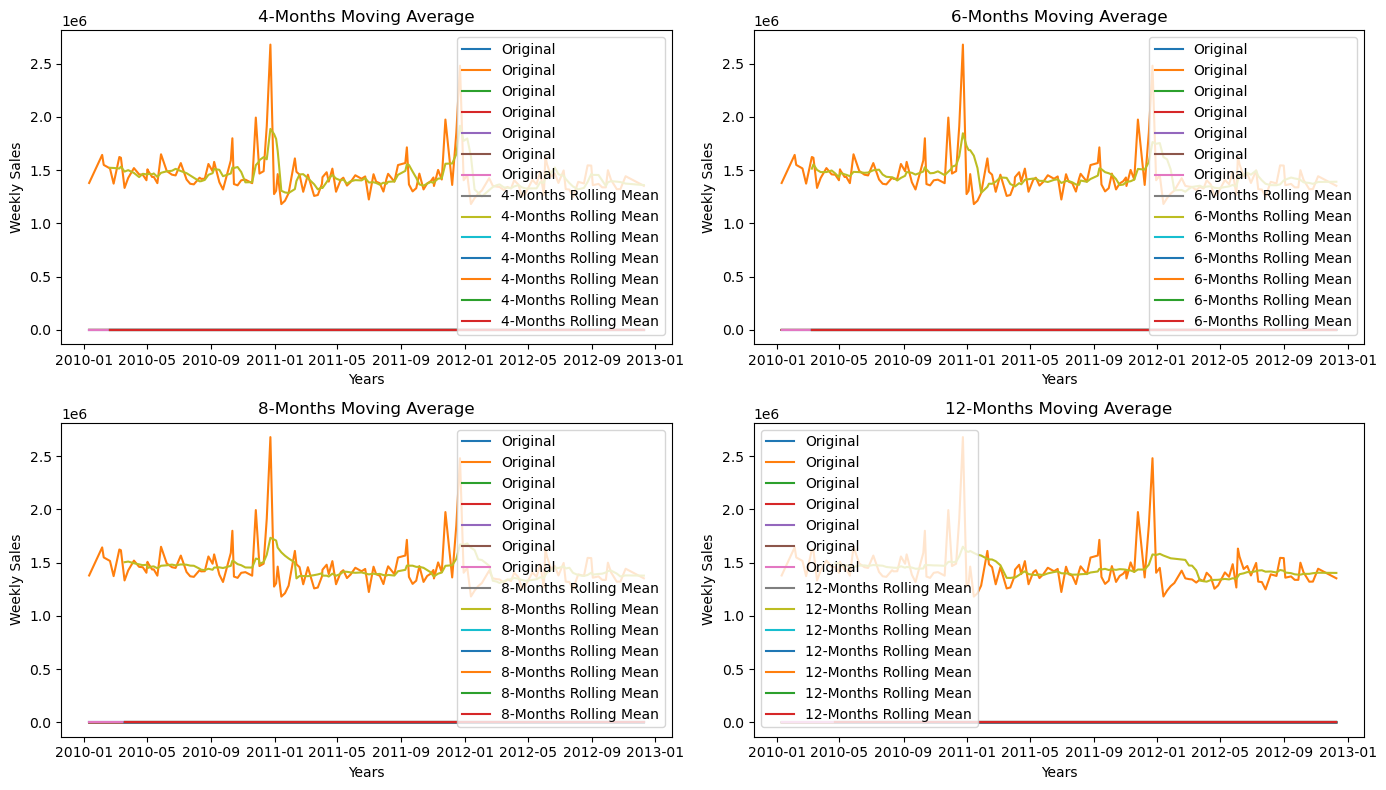

In [36]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(store_data.index, store_data, label='Original')
axes[0][0].plot(store_data.index, store_data.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(store_data.index, store_data, label='Original')
axes[0][1].plot(store_data.index, store_data.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(store_data.index, store_data, label='Original')
axes[1][0].plot(store_data.index, store_data.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(store_data.index, store_data, label='Original')
axes[1][1].plot(store_data.index, store_data.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [37]:
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift() #removing seasonality

In [38]:
rolling_mean_detrended_diff[:13]

CPI  Date  Fuel_Price  Holiday_Flag  Store  Temperature  \
Date                                                                       
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10       NaN   NaN         NaN           NaN    NaN          NaN   
2010-01-10  78.64783   NaN      -0.237           0.0 -21.75        2.515   

            Unemployment   Weekly_Sales  
Date                                     
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10           NaN            NaN  
2010-01-10      -0.22825  483478.704167

In [39]:
store_data['Weekly_Sales_Diff'] = store_data['Weekly_Sales'] - store_data['Weekly_Sales'].shift(1)
result = adfuller(store_data['Weekly_Sales_Diff'].dropna())
if result[1] <= 0.05:
    print("Time series is stationary.")
else:
    print("Time series is not stationary. You may need to difference again or apply other transformations.")


Time series is stationary.


C:\Users\HP\AppData\Local\Temp\ipykernel_14552\4084673951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['Weekly_Sales_Diff'] = store_data['Weekly_Sales'] - store_data['Weekly_Sales'].shift(1)


<AxesSubplot:xlabel='Date'>

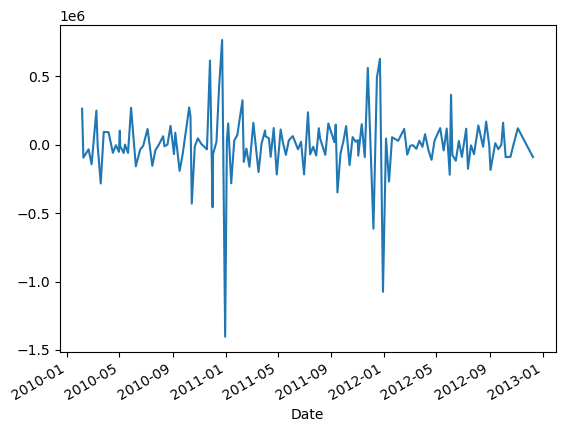

In [40]:
store_data['Weekly_Sales_Diff'].plot()

In [41]:
!pip install pmdarima

In [42]:
from pmdarima import auto_arima

In [43]:
store_data.drop(columns='Weekly_Sales',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14552\880470189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data.drop(columns='Weekly_Sales',inplace=True)


In [44]:
a = store_data.dropna()

In [45]:
order = auto_arima(a['Weekly_Sales_Diff'])
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1924.317
Date:                Fri, 08 Dec 2023   AIC                           3856.635
Time:                        14:40:19   BIC                           3868.458
Sample:                             0   HQIC                          3861.439
                                - 142                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7553      0.069    -10.947      0.000      -0.891      -0.620
ma.L1          0.0109      0.070      0.156      0.876      -0.126       0.147
ma.L2         -0.9541      0.061    -15.766      0.000      -1.073      -0.835
sigma2      3.969e+10   5.38e-13   7.38e+22      0.000    3.97e+10    3.97e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               577.33
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             2.47
Prob(H) (two-sided):                  0.27   Kurtosis:                        11.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+38. Standard errors may be unstable.
"""

In [46]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


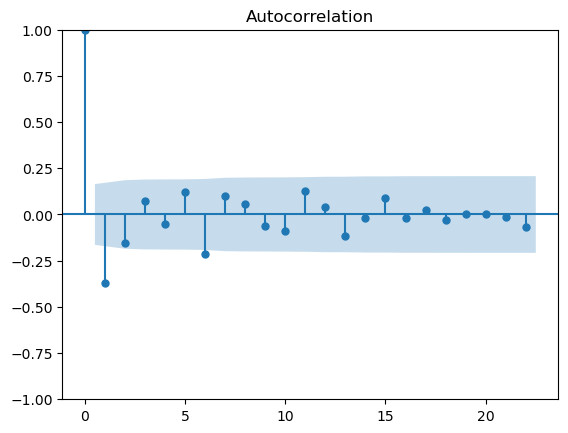

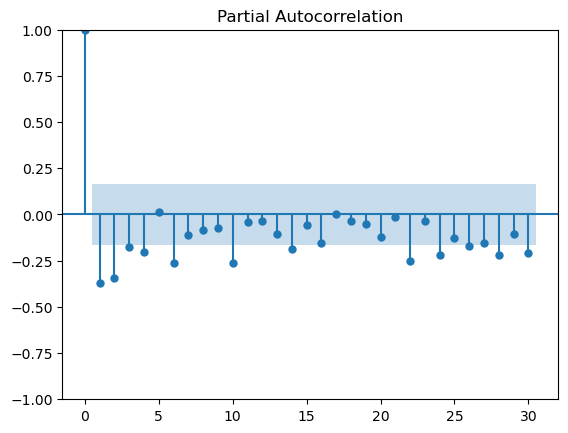

In [47]:
plot_acf(a['Weekly_Sales_Diff']);
plot_pacf(a['Weekly_Sales_Diff'],lags=30);

In [48]:
########################################################################################################################33

In [49]:
from statsmodels.tsa.arima.model import ARIMA

In [50]:
train = a.iloc[:60]['Weekly_Sales_Diff']
test = a.iloc[60:]['Weekly_Sales_Diff']

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model=SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,52),enforce_stationarity=False)
model=model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Temp\ipykernel_14552\3051070743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['predict'] = model.predict(start= len(train) ,end=len(train)+len(test)- 1,dynamic=True)


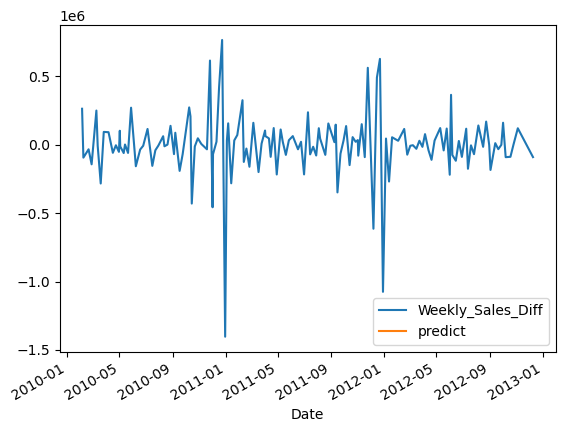

In [52]:
a['predict'] = model.predict(start= len(train) ,end=len(train)+len(test)- 1,dynamic=True)
a[['Weekly_Sales_Diff','predict']].plot()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

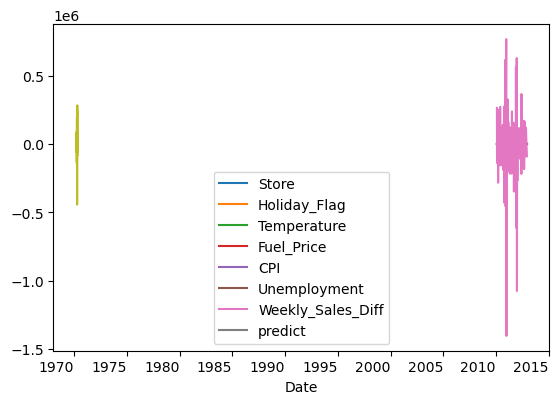

In [53]:
forecast=model.forecast(steps=52)
a.plot()
forecast.plot()

In [54]:
#####################################################################################################333

In [55]:
a[['Weekly_Sales_Diff','predict']]

Weekly_Sales_Diff  predict
Date                                  
2010-02-04          263513.97      NaN
2010-02-07          -93951.59      NaN
2010-02-19          -33042.57      NaN
2010-02-26         -142706.05      NaN
2010-03-09          250249.58      NaN
...                       ...      ...
2012-10-08          -90588.78      NaN
2012-10-19          -87805.54      NaN
2012-10-26            1015.61      NaN
2012-11-05          120755.26      NaN
2012-12-10          -90063.72      NaN

[142 rows x 2 columns]